In [2]:
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
print("각 열의 데이터 타입:")
print(df.dtypes)

각 열의 데이터 타입:
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [4]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])
df['Released_Year'] = df['Released_Year'].astype(int)

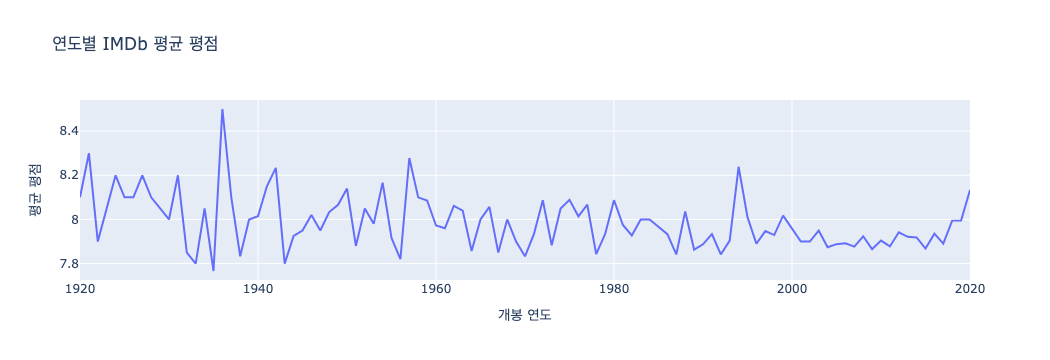

In [6]:
import plotly.express as px
average_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()


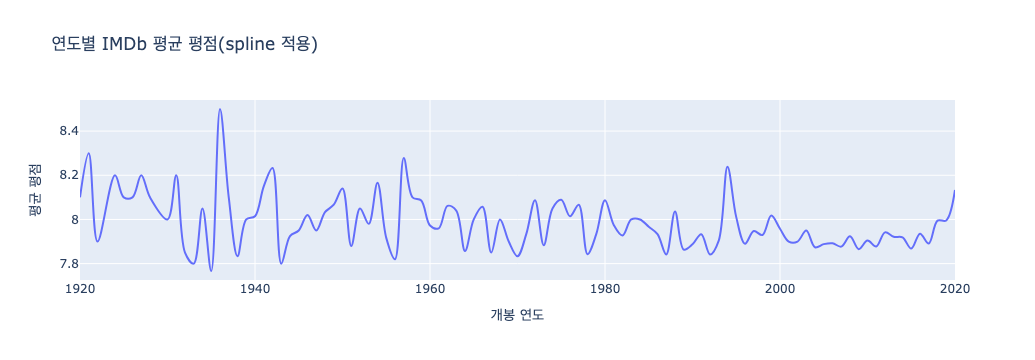

In [7]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(spline 적용)',
    line_shape='spline',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

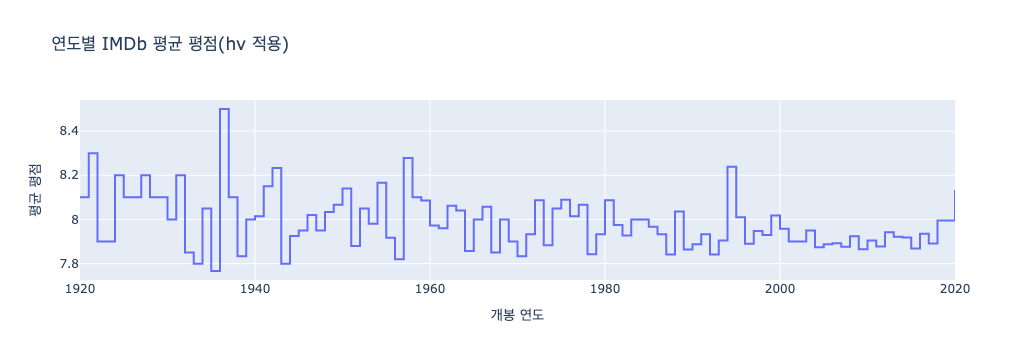

In [8]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(hv 적용)',
    line_shape='hv',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

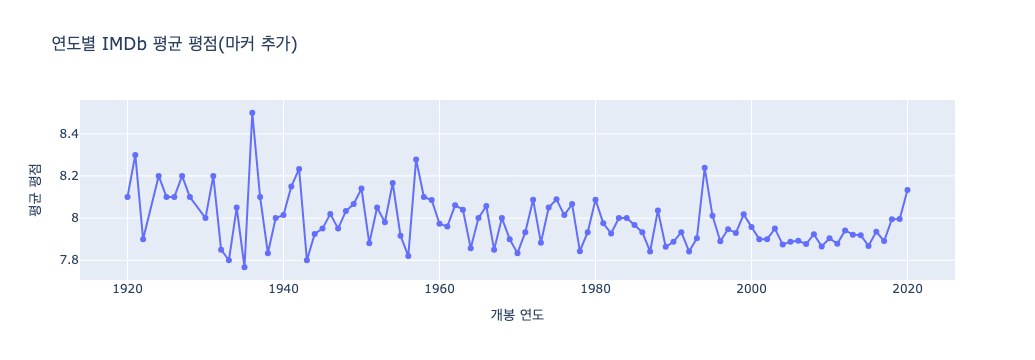

In [9]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(마커 추가)',
    markers=True,
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

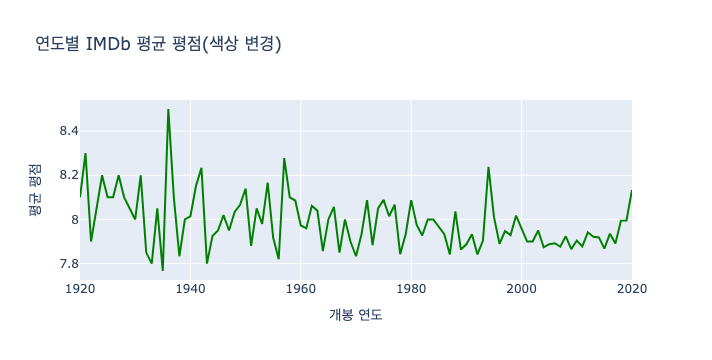

In [10]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(색상 변경)',
    color_discrete_sequence=['green'],
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

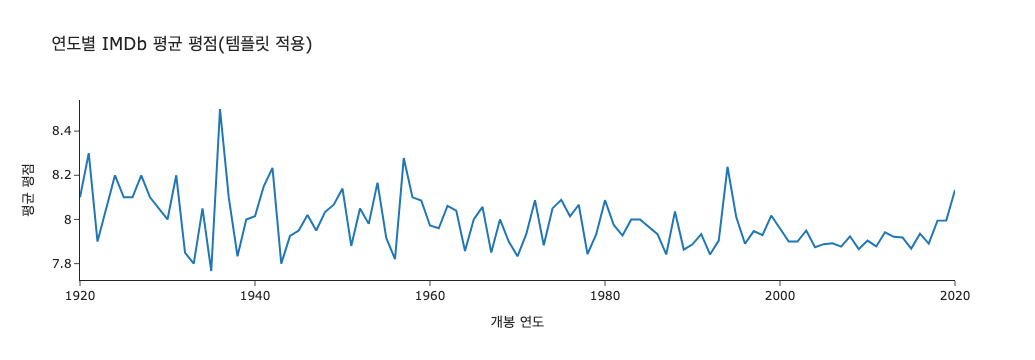

In [11]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(템플릿 적용)',
    template='simple_white',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

In [12]:
import plotly.express as px
top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]

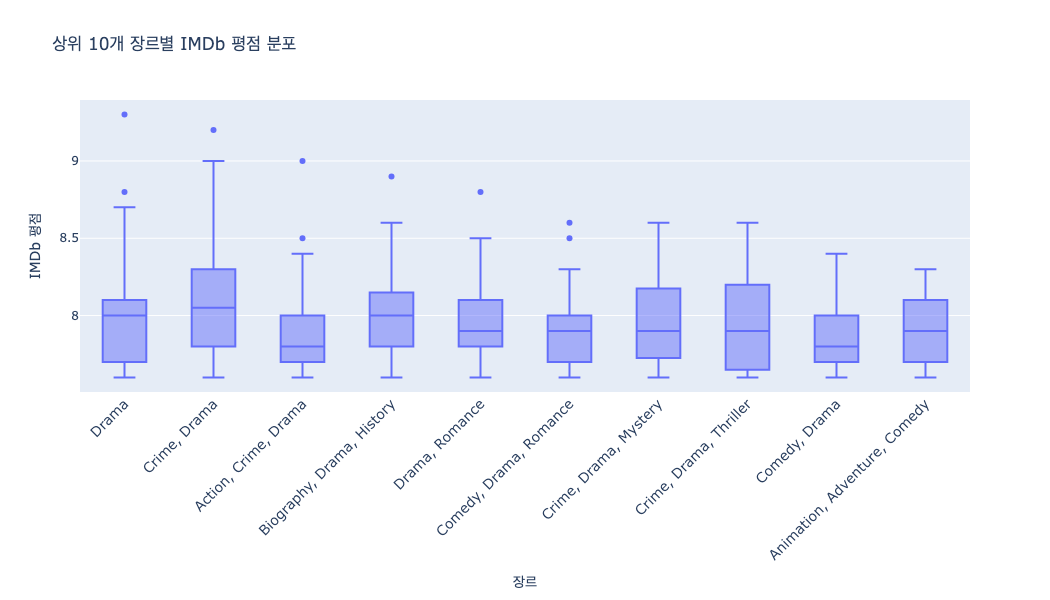

In [13]:
fig = px.box(
    df_top_genres,
    x='Genre',
    y='IMDB_Rating',
    title='상위 10개 장르별 IMDb 평점 분포'
)

fig.update_layout(
    width=900,
    height=600,
    xaxis_title='장르',
    yaxis_title='IMDb 평점',
    xaxis_tickangle=-45,
    xaxis=dict(tickfont=dict(size=14))
)
fig.show()

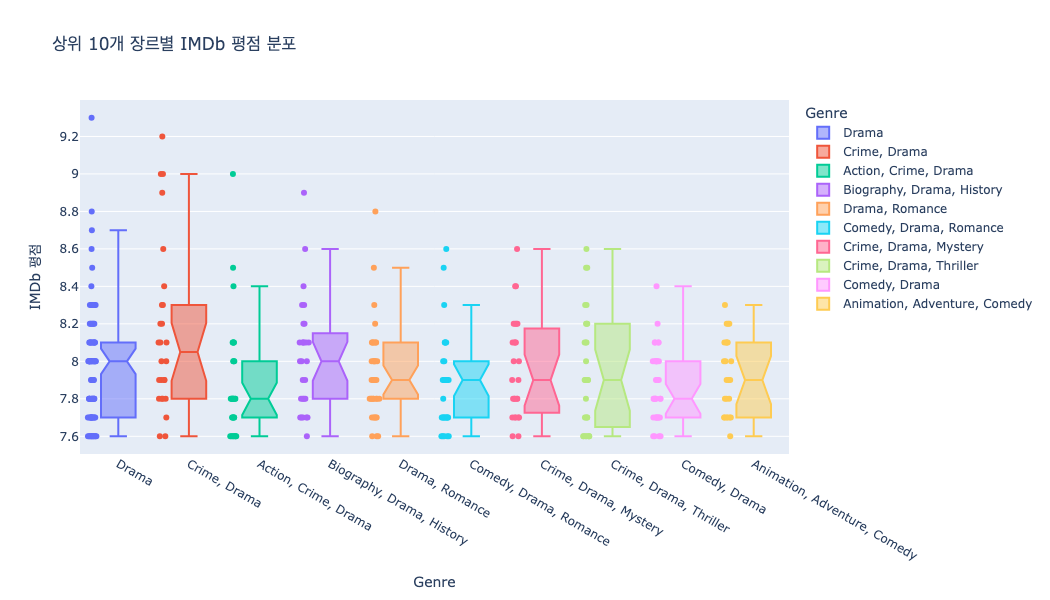

In [14]:
top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]

fig = px.box(
    df_top_genres,
    x='Genre',
    y='IMDB_Rating',
    title='상위 10개 장르별 IMDb 평점 분포',
    height=600,
    color='Genre',
    points='all',
    notched=True
)
fig.update_layout(
    yaxis_title='IMDb 평점',
)
fig.show()

In [15]:
df['Gross'] = df['Gross'].replace({',': ''}, regex=True).astype(float)
correlation_data = df[['IMDB_Rating', 'No_of_Votes', 'Gross', 'Meta_score']].dropna()

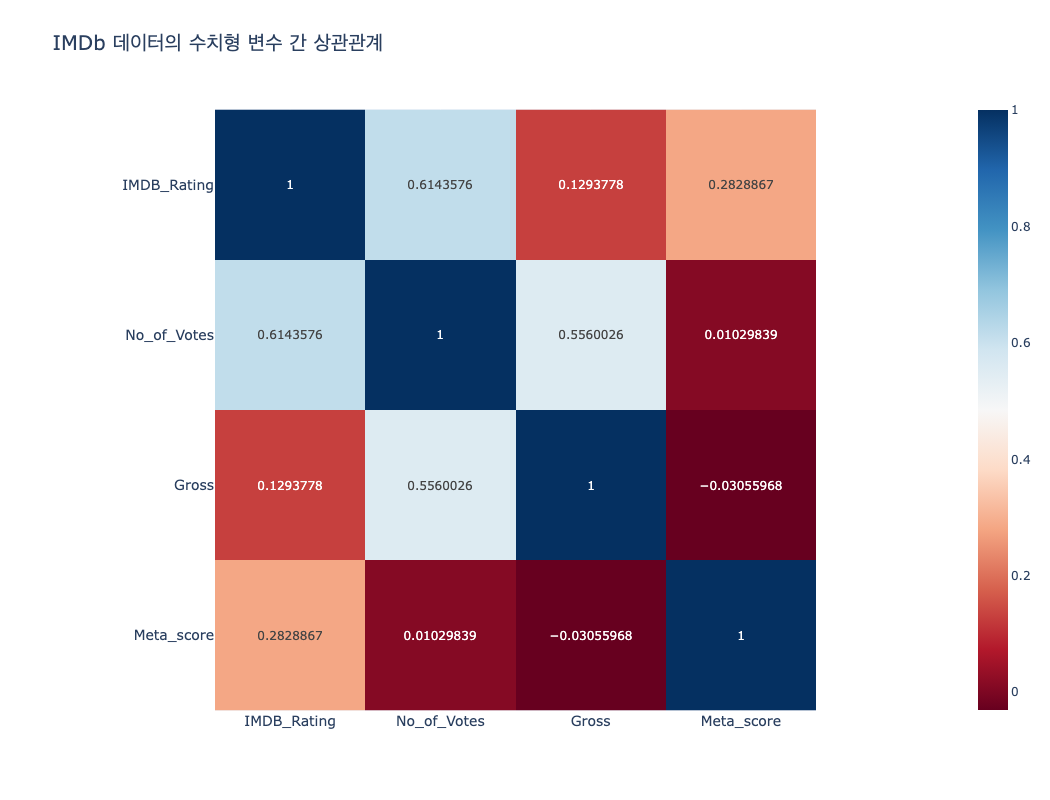

In [16]:
correlation_matrix = correlation_data.corr()

fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    title='IMDb 데이터의 수치형 변수 간 상관관계',
    color_continuous_scale='RdBu')

fig.update_layout(
    width=800,
    height=800,
    title_font_size=20,
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)
fig.show()

In [17]:
import pandas as pd
data = {
    'Temperature': [30, 35, 40, 45, 50],
    'Ice_Cream_Sales': [100, 150, 200, 250, 300],
    'Rainfall': [3, 2, 0, 0, 1]
}

df = pd.DataFrame(data)
correlation_maxtrix = df.corr()
print(correlation_matrix)

             IMDB_Rating  No_of_Votes     Gross  Meta_score
IMDB_Rating     1.000000     0.614358  0.129378    0.282887
No_of_Votes     0.614358     1.000000  0.556003    0.010298
Gross           0.129378     0.556003  1.000000   -0.030560
Meta_score      0.282887     0.010298 -0.030560    1.000000


In [1]:
import pandas as pd
df = pd.read_csv('seoul_apartment.csv')
df.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,1,서울특별시 종로구 사직동,9,9,0,광화문스페이스본(101동~105동),94.51,200811,3,63000,6,2008,사직로8길 4
1,2,서울특별시 종로구 사직동,9,9,0,광화문스페이스본(101동~105동),146.92,200810,10,97000,13,2008,사직로8길 4
2,3,서울특별시 종로구 사직동,9,9,0,광화문스페이스본(101동~105동),146.92,200810,7,100000,1,2008,사직로8길 4
3,4,서울특별시 종로구 사직동,9,9,0,광화문스페이스본(101동~105동),146.92,200810,1,95000,12,2008,사직로8길 4
4,5,서울특별시 종로구 사직동,9,9,0,광화문스페이스본(101동~105동),146.92,200809,26,95000,11,2008,사직로8길 4


In [2]:
text = "서울특별시 종로구 사직동"
split_text = text.split(' ')
print(split_text)

['서울특별시', '종로구', '사직동']


In [4]:
data = {
    '시군구': ['서울특별시 종로구 사직동', '서울특별시 강남구 삼성동', '서울특별시 서초구 반포동']
}
df = pd.DataFrame(data)
df[['시', '구', '동']] = df['시군구'].str.split(' ', expand=True)
print("expand=True 사용:")
print(df)

expand=True 사용:
             시군구      시    구    동
0  서울특별시 종로구 사직동  서울특별시  종로구  사직동
1  서울특별시 강남구 삼성동  서울특별시  강남구  삼성동
2  서울특별시 서초구 반포동  서울특별시  서초구  반포동


In [5]:
df[['시', '구', '동']] = df['시군구'].str.split(' ')
print("expand=True 사용 안 함:")
print(df)

expand=True 사용 안 함:
             시군구      시      구      동
0  서울특별시 종로구 사직동  서울특별시  서울특별시  서울특별시
1  서울특별시 강남구 삼성동    종로구    강남구    서초구
2  서울특별시 서초구 반포동    사직동    삼성동    반포동


In [7]:
df = pd.read_csv('seoul_apartment.csv')
df[['시', '구', '동']] = df['시군구'].str.split(' ', expand=True)
print(df[['시', '구', '동']].head())

       시    구    동
0  서울특별시  종로구  사직동
1  서울특별시  종로구  사직동
2  서울특별시  종로구  사직동
3  서울특별시  종로구  사직동
4  서울특별시  종로구  사직동


In [8]:
s = "202501"
year = s[:4]
month = s[4:]
print(year, month)

2025 01


In [9]:
df['연도'] = df['계약년월'].astype(str).str[:4].astype(int)
print(df['연도'])

0          2008
1          2008
2          2008
3          2008
4          2008
           ... 
1260221    2011
1260222    2011
1260223    2011
1260224    2011
1260225    2011
Name: 연도, Length: 1260226, dtype: int64


In [11]:
yearly_price_by_gu = df.groupby(['구', '연도'])['거래금액(만원)'].mean()
print("구와 연도별 부동산 평균 거래금액:")
yearly_price_by_gu

구와 연도별 부동산 평균 거래금액:


구    연도  
강남구  2006    71783.182007
     2007    62853.977729
     2008    73929.935913
     2009    90239.684268
     2010    86868.344609
                 ...     
중랑구  2020    50938.313793
     2021    64537.044903
     2022    48723.508137
     2023    57077.317560
     2024    57065.298289
Name: 거래금액(만원), Length: 475, dtype: float64

In [12]:
data = {
    '구': ['강남구', '강남구', '강동구', '강동구'],
    '연도': [2008, 2009, 2008, 2009],
    '거래금액(만원)': [85000, 87000, 76000, 80000]
}
df_t = pd.DataFrame(data)
df_t_grouped = df_t.groupby(['구', '연도'])['거래금액(만원)'].mean()
print("unstack() 사용 전:")
print(df_t_grouped)
df_t_grouped = df_t_grouped.unstack()
print("\nunstack()사용 후:")
print(df_t_grouped)

unstack() 사용 전:
구    연도  
강남구  2008    85000.0
     2009    87000.0
강동구  2008    76000.0
     2009    80000.0
Name: 거래금액(만원), dtype: float64

unstack()사용 후:
연도      2008     2009
구                    
강남구  85000.0  87000.0
강동구  76000.0  80000.0


In [14]:
yearly_price_by_gu = df.groupby(['구', '연도'])['거래금액(만원)'].mean().unstack()
print("구별 부동산의 연도별 평균 거래금액:")
yearly_price_by_gu.head()

구별 부동산의 연도별 평균 거래금액:


연도,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
구,,,,,,,,,,,,,,,,,,,
강남구,71783.182007,62853.977729,73929.935913,90239.684268,86868.344609,84606.980999,82545.532588,83792.127479,88089.237138,94148.455639,107396.720630,127090.655172,152713.499151,180344.163265,183069.978638,208035.504690,199448.487443,217285.010305,234634.166466
강동구,38582.579959,34501.739244,37258.655262,43879.123463,43888.680471,43408.405495,43170.996424,41474.606279,41454.902934,45726.793499,50555.271726,58074.584982,64979.505252,73581.189969,83853.069487,93647.988737,85278.782288,100710.325103,104558.703947
강북구,21315.016769,24496.712995,29824.800508,31225.276573,30760.329489,30603.733706,29788.926708,30546.154255,31795.288599,32514.594753,35667.490246,36844.074906,42271.102422,46813.211207,55941.708774,66783.405782,50226.363636,50720.421546,59193.493274
강서구,24788.367587,23185.486258,28322.435602,34630.784631,34214.369934,33691.651241,31749.800000,32524.193129,34365.881816,36098.932242,42319.653960,46634.680499,53062.572860,60388.279604,67700.339295,79163.168182,65631.551111,74675.276855,75997.643243
관악구,27180.226570,29540.273005,34471.914091,35945.203638,34925.186327,35453.903628,32117.926632,32607.376671,34610.493629,36519.630295,38164.973520,40720.484894,47166.878767,53554.810083,61841.345185,72938.245968,63250.239234,67372.519380,69450.507614


In [15]:
data = {
    '구': ['강남구', '강동구', '강북구'],
    '2008': [85000, 76000, 29824],
    '2009': [87000, 80000, 31225],
    '2010': [86868, 43888, 30760]
}
df_wide = pd.DataFrame(data)
print("원본 데이터프레임(와이드 포맷):")
print(df_wide)

원본 데이터프레임(와이드 포맷):
     구   2008   2009   2010
0  강남구  85000  87000  86868
1  강동구  76000  80000  43888
2  강북구  29824  31225  30760


In [16]:
df_long = pd.melt(df_wide, id_vars='구', var_name='연도', value_name='거래금액(만원)')
print("melt() 적용 후 데이터프레임(롱 포맷):")
print(df_long)

melt() 적용 후 데이터프레임(롱 포맷):
     구    연도  거래금액(만원)
0  강남구  2008     85000
1  강동구  2008     76000
2  강북구  2008     29824
3  강남구  2009     87000
4  강동구  2009     80000
5  강북구  2009     31225
6  강남구  2010     86868
7  강동구  2010     43888
8  강북구  2010     30760


In [19]:
df_partial = pd.melt(df_wide, id_vars='구', value_vars=['2008', '2009'], var_name='연도', value_name='거래금액(만원)')
print("2008년과 2009년 데이터만 변환:")
print(df_partial)

2008년과 2009년 데이터만 변환:
     구    연도  거래금액(만원)
0  강남구  2008     85000
1  강동구  2008     76000
2  강북구  2008     29824
3  강남구  2009     87000
4  강동구  2009     80000
5  강북구  2009     31225


In [25]:
yearly_pice_by_gu_reset = yearly_price_by_gu.reset_index()
yearly_price_long = pd.melt(yearly_pice_by_gu_reset, id_vars='구', var_name='연도', value_name='거래금액(만원)')
print(yearly_price_long)

       구    연도       거래금액(만원)
0    강남구  2006   71783.182007
1    강동구  2006   38582.579959
2    강북구  2006   21315.016769
3    강서구  2006   24788.367587
4    관악구  2006   27180.226570
..   ...   ...            ...
470  용산구  2024  240126.806867
471  은평구  2024   73592.109777
472  종로구  2024  103333.010753
473   중구  2024  101652.173913
474  중랑구  2024   57065.298289

[475 rows x 3 columns]


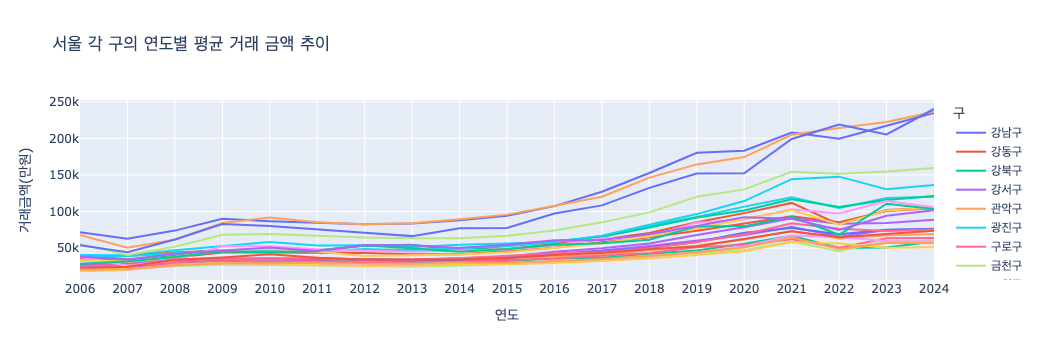

In [26]:
import plotly.express as px 
yearly_price_long['연도'] = yearly_price_long['연도'].astype(str)
fig = px.line(
    yearly_price_long,
    x='연도',
    y='거래금액(만원)',
    color='구',
    title='서울 각 구의 연도별 평균 거래 금액 추이'
)
fig.show()

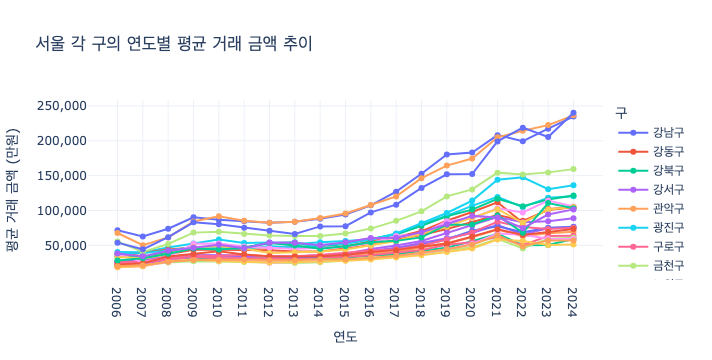

In [27]:
fig = px.line(
    yearly_price_long,
    x='연도', y='거래금액(만원)',
    color='구',
    title='서울 각 구의 연도별 평균 거래 금액 추이',
    markers=True
)

fig.update_layout(
    xaxis_title='연도',
    yaxis_title='평균 거래 금액 (만원)',
    yaxis=dict(
        title='평균 거래 금액 (만원)',
        tickformat=',d'
    ),
    legend_title='구',
    template='plotly_white'
)

fig.show()

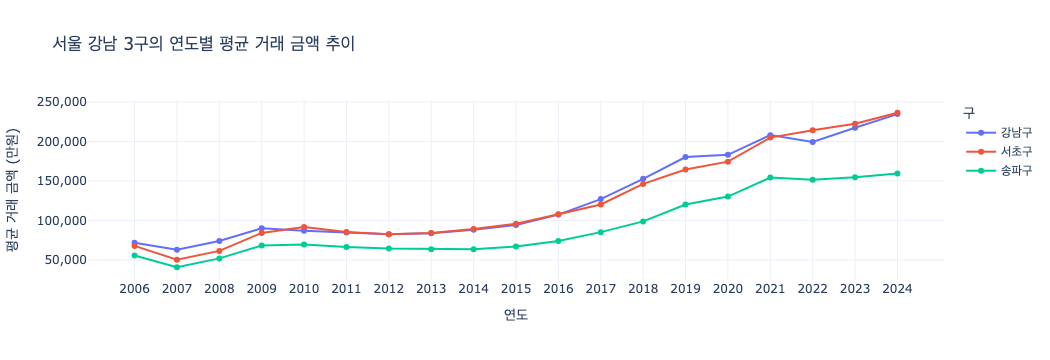

In [28]:
selected_gu = ['강남구', '서초구', '송파구']
filtered_data = yearly_price_long[yearly_price_long['구'].isin(selected_gu)]

fig = px.line(
    filtered_data,
    x='연도',
    y='거래금액(만원)',
    color='구',
    title='서울 강남 3구의 연도별 평균 거래 금액 추이',
    markers=True
)

fig.update_layout(
    xaxis_title='연도',
    yaxis=dict(
        title='평균 거래 금액 (만원)',
        tickformat=',d'
    ),
    legend_title='구',
    template='plotly_white'
)

fig.show()

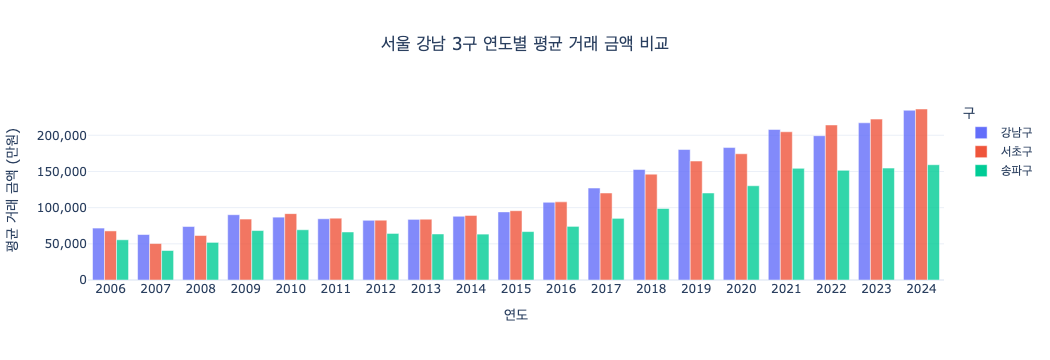

In [29]:
fig = px.bar(
    filtered_data,
    x='연도',
    y='거래금액(만원)',
    color='구',
    barmode='group',
    opacity=0.8,
    title='서울 강남 3구 연도별 평균 거래 금액 비교'
)

fig.update_layout(
    title=dict(
        x=0.5,  
        xanchor='center'
    ),
    xaxis=dict( 
        title='연도',
        categoryorder='category ascending'
    ),
    yaxis=dict(
        title='평균 거래 금액 (만원)',
        tickformat=',d'
    ),
    legend_title='구',
    template='plotly_white',
)

fig.show()

In [1]:
import pandas as pd
df = pd.read_csv('ecommerce_sales_data.csv')
df.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [2]:
city_category_summary = pd.pivot_table(
    df,
    values='Sales',
    index='City',
    columns='Product Category',
    aggfunc=['sum', 'mean']
)
print(city_category_summary)

                           sum                            \
Product Category Audio Devices  Batterie Charging Cables   
City                                                       
Atlanta              317221.37  15474.53        50975.30   
Austin               217291.63  10455.48        34489.10   
Boston               416177.62  21929.83        67844.40   
Dallas               305400.68  16169.20        49998.20   
Los Angeles          622636.05  31893.25       101586.30   
New York City        526538.99  26269.96        84527.50   
Portland             270071.49  13664.96        41793.35   
San Francisco        951159.17  47321.12       153510.45   
Seattle              314696.86  15680.90        48870.80   

                                                                              \
Product Category Entertainment Devices Home Appliances Laptops and Computers   
City                                                                           
Atlanta                       122100.0 

In [4]:
city_category_sales = pd.pivot_table(
    df,
    values='Sales',
    index='City',
    columns='Product Category',
    aggfunc='sum'
)

nyc_sales = city_category_sales.loc[' New York City', ['Laptops and Computers', 'Phones and Accessories']]
nyc_slaes = nyc_sales.reset_index()
nyc_sales.columns = ['Product Category', 'Sales']
print(nyc_sales)

Product Category
Laptops and Computers     1676894.4
Phones and Accessories    1183900.0
Name:  New York City, dtype: float64


In [6]:
nyc_sales = city_category_sales.loc[' New York City', ['Laptops and Computers', 'Phones and Accessories']]
print(city_category_sales.index)
print(df['City'].unique())

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='City')
[' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


In [7]:
df['City'] = df['City'].str.strip()
print(df['City'].unique())

['New York City' 'San Francisco' 'Atlanta' 'Portland' 'Dallas'
 'Los Angeles' 'Boston' 'Austin' 'Seattle']


In [10]:
city_category_sales = pd.pivot_table(
    df,
    values='Sales',
    index='City',
    columns='Product Category',
    aggfunc='sum'
)
nyc_sales = city_category_sales.loc['New York City', ['Laptops and Computers', 'Phones and Accessories']]
nyc_sales = nyc_sales.reset_index()
nyc_sales.columns = ['Product Category', 'Sales']
print(nyc_sales)

         Product Category      Sales
0   Laptops and Computers  1676894.4
1  Phones and Accessories  1183900.0


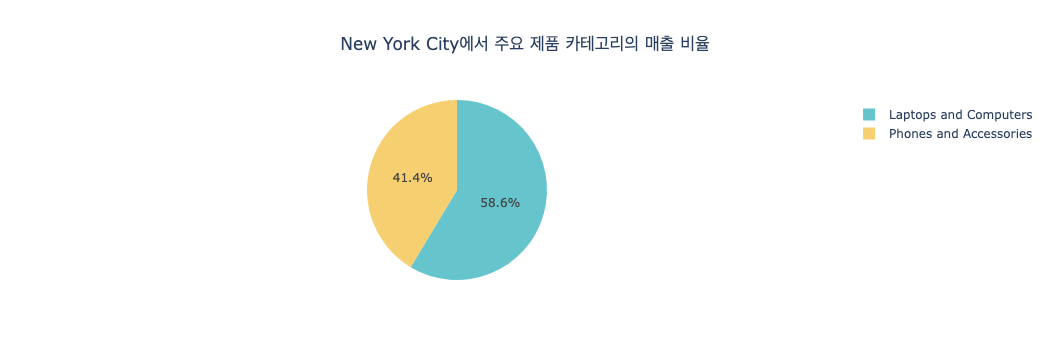

In [11]:
import plotly.express as px 
fig = px.pie(
    nyc_sales,
    values='Sales',
    names='Product Category',
    title='New York City에서 주요 제품 카테고리의 매출 비율',
    color_discrete_sequence=px.colors.qualitative.Pastel  
)
fig.update_layout(
    title_x=0.5,  
    template='plotly_white'  
)
fig.show()

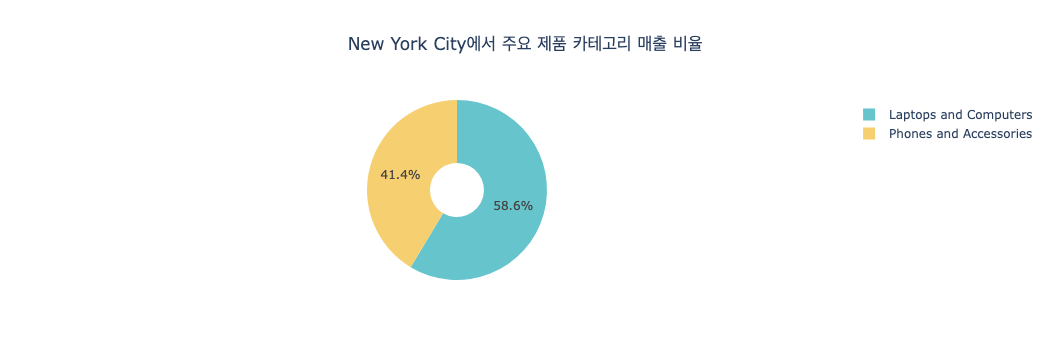

In [12]:
fig = px.pie(
    nyc_sales,
    values='Sales',
    names='Product Category',
    title='New York City에서 주요 제품 카테고리 매출 비율',
    color_discrete_sequence=px.colors.qualitative.Pastel, 
    hole=0.3,
    labels={'Product Category': '제품 카테고리', 'Sales': '매출 (USD)'}
)
fig.update_layout(
    title_x=0.5,        
    template='plotly_white',  
)
fig.show()